# Final Project - ML - 202201 - Universidad del Norte
    
   ### Presented by:
    Ariza Coll Sebastian David - 200087781.
    Peñaranda Bello Hernaldo Rafael - 8526327.

### Let's start downloading audio data 

In [1]:
!wget 'https://zenodo.org/record/3371780/files/audio_mono-mic.zip'
!wget 'https://zenodo.org/record/3371780/files/audio_mono-pickup_mix.zip'

--2022-06-08 11:41:58--  https://zenodo.org/record/3371780/files/audio_mono-mic.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 656927981 (626M) [application/octet-stream]
Saving to: ‘audio_mono-mic.zip’

100%[======================================>] 656,927,981  310KB/s   in 8m 23s 

2022-06-08 11:50:23 (1.24 MB/s) - ‘audio_mono-mic.zip’ saved [656927981/656927981]

--2022-06-08 11:50:24--  https://zenodo.org/record/3371780/files/audio_mono-pickup_mix.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683145360 (651M) [application/octet-stream]
Saving to: ‘audio_mono-pickup_mix.zip’

100%[======================================>] 683,145,360 2.17MB/s   in 9m 16s 

2022-06-08 11:59:42 (1.17 MB/s) - ‘audio_mono-pickup_mix.zip’ sa

### Let's create folder to store all the information needed

In [3]:
!mkdir audio
!mkdir audio/mono_mic
!mkdir audio/mono_pickup
!mkdir audio/annotation

In [1]:
from zipfile import ZipFile # for zip files

### Function to extract .zip files

In [6]:
def unZip_files(file_path:str, to_path:str):
    with ZipFile(file_path, 'r') as zipObj:
    # Extract all the contents of zip file in current directory
        zipObj.extractall(path=to_path)
    print('Extract done!')

In [7]:
unZip_files('./audio_mono-mic.zip', './audio/mono_mic/') # Extract mono audios

Extract done!


In [8]:
unZip_files('./audio_mono-pickup_mix.zip', './audio/mono_pickup/') # Extract pickup audios

Extract done!


### Now let's download the annotation audios files

In [9]:
!wget "https://zenodo.org/record/3371780/files/annotation.zip"

--2022-06-08 12:11:12--  https://zenodo.org/record/3371780/files/annotation.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39132574 (37M) [application/octet-stream]
Saving to: ‘annotation.zip’

100%[======================================>] 39,132,574  2.90MB/s   in 25s    

2022-06-08 12:11:38 (1.52 MB/s) - ‘annotation.zip’ saved [39132574/39132574]



In [10]:
unZip_files('./annotation.zip', './audio/annotation/') # Let's extract annotation files

Extract done!


In [98]:
!mkdir data

In [1]:
import glob
import librosa
import librosa.display
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import jams
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

### Into data let's segment the audios by 0.25 secounds and  create a Data Frame to localize them

In [99]:
rows = []
for audio in tqdm(glob.glob('./audio/mono_mic/*.wav'), desc='segmenting audios'):
    cont = 1
    audio_name = audio.split('/')[-1].split('.')[0]
    x, Fs = librosa.load(audio)
    buffer = int(Fs * 0.25)
    samples_total = len(x)
    samples_taken = 0
    start = 0
    end = 0.25
    os.mkdir(f'./data/{audio_name}')
    while samples_taken < samples_total:
        if buffer > (samples_total-samples_taken):
            buffer = samples_total - samples_taken
        if buffer == 5512:
            x_val = x[samples_taken:(samples_taken+buffer)]
            save_audio_path = f'./data/{audio_name}/{audio_name}_{cont}.wav'
            rows.append([cont, audio_name, start, end])
            sf.write(save_audio_path, x_val, Fs, 'PCM_24')
            cont += 1
            start = end
            end += 0.25
        samples_taken += buffer

segmenting audios: 100%|█████████████████████████████████████████████████| 360/360 [08:36<00:00,  1.44s/it]


In [100]:
df = pd.DataFrame(rows,columns=['segment','path', 'start', 'end']) # convert to df

In [106]:
df.to_csv('audio_paths_segmented.csv', index= False) # save the df

In [107]:
df # show it

,segment,path,start,end
0,1,00_SS3-84-Bb_comp_mic,0.00,0.25
1,2,00_SS3-84-Bb_comp_mic,0.25,0.50
2,3,00_SS3-84-Bb_comp_mic,0.50,0.75
3,4,00_SS3-84-Bb_comp_mic,0.75,1.00
4,5,00_SS3-84-Bb_comp_mic,1.00,1.25
...,...,...,...,...
43723,139,00_SS2-107-Ab_solo_mic,34.50,34.75
43724,140,00_SS2-107-Ab_solo_mic,34.75,35.00
43725,141,00_SS2-107-Ab_solo_mic,35.00,35.25
43726,142,00_SS2-107-Ab_solo_mic,35.25,35.50


### Function to show and listen one audio

In [108]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    librosa.display.waveshow(x, sr=Fs)
    # plt.plot(x, color='gray')
    # plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

WAV file:  Fs = 44100, x.shape = (1270080,), x.dtype = float32


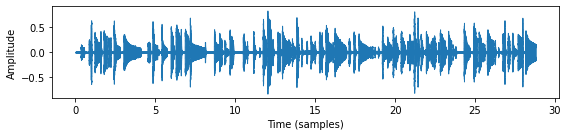

In [109]:
# Read wav
x, Fs = librosa.load('./audio/mono_mic/03_SS1-100-C#_solo_mic.wav', sr=None)
print_plot_play(x=x, Fs=Fs, text='WAV file: ')

WAV file:  Fs = 22050, x.shape = (5512,), x.dtype = float32


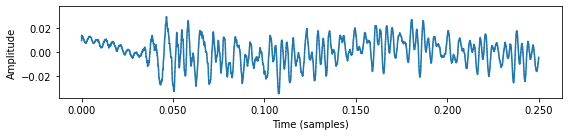

In [110]:
# Read wav
x, Fs = librosa.load('./data/00_BN1-129-Eb_comp_mic/00_BN1-129-Eb_comp_mic_1.wav', sr=None)
print_plot_play(x=x, Fs=Fs, text='WAV file: ')

### Function to compute the note

In [134]:
def get_note(nota_ini:str, traste:int):
    nota = nota_ini.strip()
    while traste > 0:
        if nota == 'C':
            #C-DO
            if traste == 1:
                nota = 'C#'
                traste -= 1
            elif traste >= 2:
                nota = 'D'
                traste -= 2 
                #C-DO 2 D-RE 2 E-MI 1 F-FA 2 G-SOL 2 A-LA 2 B-SI 1 C-DO   
        elif nota == 'D':
            #D-RE
            if traste == 1:
                nota = 'D#'
                traste -= 1
            elif traste >= 2:
                nota = 'E'
                traste -= 2  
        elif nota == 'E' or nota == 'e':
            #E-MI
            if traste >= 1:
                nota = 'F'
                traste -= 1
        elif nota == 'F':
            #F-FA
            if traste == 1:
                nota = 'F#'
                traste -= 1
            elif traste >= 2:
                nota = 'G'
                traste -= 2 
        elif nota == 'G':
            #G-SOL
            if traste == 1:
                nota = 'G#'
                traste -= 1
            elif traste >= 2:
                nota = 'A'
                traste -= 2 
        elif nota == 'A':
            #A-LA
            if traste == 1:
                nota = 'A#'
                traste -= 1
            elif traste >= 2:
                nota = 'B'
                traste -= 2 
        elif nota == 'B':
            #B-SI
            if traste >= 1:
                nota = 'C'
                traste -= 1
    return nota

### Now we create a Data frame to know the auido name, time and note played

In [140]:
df = pd.DataFrame(columns=['path','traste', 'time', 'cuerda', 'nota', 'n_cuerda'])
str_midi_dict = {0: 40, 1: 45, 2: 50, 3: 55, 4: 59, 5: 64}
string_dict = {0: 'E', 1: 'A', 2: 'D', 3: 'G', 4: 'B', 5: 'e'}
for file_path in tqdm(glob.glob('./audio/annotation/*.jams'), desc='checking annotations'):
    rows = []
    s = 0
    jam = jams.load(file_path)
    path = file_path.split('/')[-1].split('.')[0]
    annos = jam.search(namespace='note_midi')
    if len(annos) == 0:
        annos = jam.search(namespace='pitch_midi')
    for string_tran in annos:
        for note in string_tran:
            start_time = note[0]
            midi_note = note[2]
            fret = int(round(midi_note - str_midi_dict[s]))
            rows.append([f'{path}_mic', fret+1, start_time, string_dict[s], get_note(string_dict[s],fret+1),s+1])
        s += 1
    df_1 = pd.DataFrame(rows, columns=['path','traste', 'time', 'cuerda', 'nota', 'n_cuerda'])
    df_1 = df_1.sort_values(by=['time'])
    df = pd.concat([df, df_1], axis=0)    

checking annotations: 100%|██████████████████████████████████████████████| 360/360 [02:46<00:00,  2.16it/s]


In [142]:
df # show it

,path,traste,time,cuerda,nota,n_cuerda
110,03_SS1-100-C#_comp_mic,7,0.008024,D,A,3
24,03_SS1-100-C#_comp_mic,5,0.008569,A,D,2
111,03_SS1-100-C#_comp_mic,7,0.294238,D,A,3
225,03_SS1-100-C#_comp_mic,7,0.296551,G,D,4
306,03_SS1-100-C#_comp_mic,7,0.436256,B,F#,5
...,...,...,...,...,...,...
26,02_SS1-68-E_comp_mic,1,40.645746,E,F,1
68,02_SS1-68-E_comp_mic,3,41.031052,A,C,2
27,02_SS1-68-E_comp_mic,1,41.343410,E,F,1
104,02_SS1-68-E_comp_mic,3,41.814136,D,F,3


In [291]:
# df.to_csv('./traste_cuerda_nota.csv', index=False)

In [2]:
df = pd.read_csv('./traste_cuerda_nota.csv')

### Let's use Random Forest classifier to predict the note played considering the guitar string

## Guitar string 1

In [3]:
df_c_1 = df[df['n_cuerda'] == 1] # take just guitar string N1

In [4]:
df_c_1

,path,traste,time,cuerda,nota,n_cuerda
117,03_SS1-100-C#_comp_mic,1,9.287707,E,F,1
119,03_SS1-100-C#_comp_mic,3,9.628115,E,G,1
121,03_SS1-100-C#_comp_mic,3,9.889816,E,G,1
129,03_SS1-100-C#_comp_mic,3,10.167934,E,G,1
137,03_SS1-100-C#_comp_mic,3,10.804600,E,G,1
...,...,...,...,...,...,...
62463,02_SS1-68-E_comp_mic,1,37.870304,E,F,1
62466,02_SS1-68-E_comp_mic,1,38.886857,E,F,1
62468,02_SS1-68-E_comp_mic,1,39.640327,E,F,1
62471,02_SS1-68-E_comp_mic,1,40.645746,E,F,1


In [5]:
df_paths = pd.read_csv('./audio_paths_segmented.csv')

In [6]:
df_paths # to have the interval audios

,segment,path,start,end
0,1,00_SS3-84-Bb_comp_mic,0.00,0.25
1,2,00_SS3-84-Bb_comp_mic,0.25,0.50
2,3,00_SS3-84-Bb_comp_mic,0.50,0.75
3,4,00_SS3-84-Bb_comp_mic,0.75,1.00
4,5,00_SS3-84-Bb_comp_mic,1.00,1.25
...,...,...,...,...
43723,139,00_SS2-107-Ab_solo_mic,34.50,34.75
43724,140,00_SS2-107-Ab_solo_mic,34.75,35.00
43725,141,00_SS2-107-Ab_solo_mic,35.00,35.25
43726,142,00_SS2-107-Ab_solo_mic,35.25,35.50


### Function to get the corresponding audio path 

In [7]:
def get_audio_id(audio_path, time):
    audio_id = df_paths[(df_paths.start < time) & (df_paths.end > time) & (df_paths.path == audio_path)].segment
    if len(audio_id) > 0:
        return f'./data/{audio_path}/{audio_path}_{int(audio_id)}.wav'
    else:
        return None

In [8]:
tqdm.pandas()

### Execute function into path

In [9]:
df_c_1['path'] = df.progress_apply(lambda x: get_audio_id(x.path,x.time), axis=1)

100%|████████████████████████████| 62476/62476 [07:08<00:00, 145.96it/s]
/work/syseng/users/sdariza/ML/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_c_1

,path,traste,time,cuerda,nota,n_cuerda
117,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,1,9.287707,E,F,1
119,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,9.628115,E,G,1
121,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,9.889816,E,G,1
129,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,10.167934,E,G,1
137,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,10.804600,E,G,1
...,...,...,...,...,...,...
62463,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,37.870304,E,F,1
62466,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,38.886857,E,F,1
62468,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,39.640327,E,F,1
62471,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,40.645746,E,F,1


### check if there are nan values and remove them

In [12]:
df_c_1[df_c_1.isna().any(axis=1)]

,path,traste,time,cuerda,nota,n_cuerda
12254,None,2,45.021537,E,F#,1


In [13]:
df_c_1 = df_c_1.dropna(axis=0)

In [14]:
df_c_1[df_c_1.isna().any(axis=1)]

,path,traste,time,cuerda,nota,n_cuerda


In [15]:
df_c_1

,path,traste,time,cuerda,nota,n_cuerda
117,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,1,9.287707,E,F,1
119,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,9.628115,E,G,1
121,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,9.889816,E,G,1
129,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,10.167934,E,G,1
137,./data/03_SS1-100-C#_comp_mic/03_SS1-100-C#_co...,3,10.804600,E,G,1
...,...,...,...,...,...,...
62463,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,37.870304,E,F,1
62466,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,38.886857,E,F,1
62468,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,39.640327,E,F,1
62471,./data/02_SS1-68-E_comp_mic/02_SS1-68-E_comp_m...,1,40.645746,E,F,1


### Function to get signal values

In [17]:
def get_x_data(file_path):
    x, Fs = librosa.load(file_path)
    return x

In [137]:
# df['path'] = df.progress_apply(lambda x: get_x_data(x['path'], x['time']), axis=1)

100%|█████████████████████████████████████████████████████████████████████| 62432/62432 [00:31<00:00, 2013.21it/s]


### Now let's create the features and labels

In [18]:
rows = []
rows1 = []
for audio_idx in tqdm(range(len(df_c_1))):
    row = df_c_1.iloc[audio_idx]
    rows.append(get_x_data(row.path))
    rows1.append(row.nota)

100%|█████████████████████████████| 4637/4637 [00:03<00:00, 1178.54it/s]


### Turn then into Data frames

In [19]:
new_df1 = pd.DataFrame(rows)
new_df2 = pd.DataFrame(rows1, columns=['label'])

In [20]:
new_df1['label'] = new_df2['label']

In [21]:
new_df1

,0,1,2,3,4,5,6,7,8,9,...,5503,5504,5505,5506,5507,5508,5509,5510,5511,label
0,-0.000873,-0.001087,-0.002538,-0.006461,-0.008151,-0.009312,-0.008088,-0.009307,-0.010673,-0.010778,...,0.046799,0.047171,0.046514,0.046530,0.045842,0.044344,0.044047,0.042791,0.042393,F
1,0.042201,0.041087,0.040006,0.038731,0.037670,0.036797,0.035037,0.032718,0.030998,0.029860,...,0.015286,0.013124,0.011071,0.009347,0.007751,0.005715,0.003778,0.002521,0.001396,G
2,0.000508,0.000125,-0.000520,-0.001205,-0.001626,-0.002321,-0.003407,-0.004944,-0.006371,-0.007810,...,-0.073702,-0.080796,-0.089594,-0.087850,-0.076374,-0.083361,-0.087387,-0.084843,-0.076940,G
3,-0.061010,-0.049723,-0.039385,-0.026413,-0.020412,-0.011290,-0.003773,-0.005063,0.003797,0.010098,...,0.010679,0.002191,-0.007260,-0.017103,-0.026050,-0.033112,-0.038485,-0.042681,-0.044909,G
4,0.044936,0.047390,0.049120,0.046136,0.042730,0.043167,0.043902,0.039147,0.028182,0.013890,...,0.018008,0.006779,-0.004194,-0.014452,-0.023018,-0.027911,-0.029176,-0.028237,-0.027244,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,0.059048,0.060709,0.062005,0.062229,0.061795,0.061093,0.060079,0.058340,0.056261,0.054577,...,-0.022990,-0.024560,-0.025538,-0.026166,-0.027871,-0.030008,-0.032594,-0.035841,-0.038174,F
4633,0.163854,0.166048,0.166360,0.165000,0.162070,0.158031,0.153231,0.147493,0.140444,0.132051,...,-0.093355,-0.109044,-0.124096,-0.139059,-0.154330,-0.168514,-0.180230,-0.190634,-0.200385,F
4634,-0.003740,-0.011753,-0.019882,-0.028391,-0.037900,-0.048995,-0.061238,-0.073753,-0.086067,-0.097744,...,-0.069754,-0.066527,-0.065138,-0.066133,-0.068498,-0.069761,-0.069655,-0.069085,-0.067515,F
4635,0.118460,0.124240,0.128036,0.130917,0.133271,0.134712,0.135630,0.136134,0.135861,0.135777,...,0.060890,0.066318,0.069285,0.070402,0.071033,0.072772,0.075888,0.080359,0.083642,F


### check if there are nan values and remove them

In [22]:
# new_df1.to_csv('c_1.csv', index=False)

In [2]:
new_df1 = pd.read_csv('./c_1.csv')

In [3]:
new_df1

,0,1,2,3,4,5,6,7,8,9,...,5503,5504,5505,5506,5507,5508,5509,5510,5511,label
0,-0.000873,-0.001087,-0.002538,-0.006461,-0.008151,-0.009312,-0.008088,-0.009307,-0.010673,-0.010778,...,0.046799,0.047171,0.046514,0.046530,0.045842,0.044344,0.044047,0.042791,0.042393,F
1,0.042201,0.041087,0.040006,0.038731,0.037670,0.036797,0.035037,0.032718,0.030998,0.029860,...,0.015286,0.013124,0.011071,0.009347,0.007751,0.005715,0.003778,0.002521,0.001396,G
2,0.000508,0.000125,-0.000520,-0.001205,-0.001626,-0.002321,-0.003407,-0.004944,-0.006371,-0.007810,...,-0.073702,-0.080796,-0.089594,-0.087850,-0.076374,-0.083361,-0.087387,-0.084843,-0.076940,G
3,-0.061010,-0.049723,-0.039385,-0.026413,-0.020412,-0.011290,-0.003773,-0.005063,0.003797,0.010098,...,0.010679,0.002191,-0.007260,-0.017103,-0.026050,-0.033112,-0.038485,-0.042681,-0.044909,G
4,0.044936,0.047390,0.049120,0.046136,0.042730,0.043167,0.043902,0.039147,0.028182,0.013890,...,0.018008,0.006779,-0.004194,-0.014452,-0.023018,-0.027911,-0.029176,-0.028237,-0.027244,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,0.059048,0.060709,0.062005,0.062229,0.061795,0.061093,0.060078,0.058340,0.056261,0.054577,...,-0.022990,-0.024560,-0.025538,-0.026166,-0.027871,-0.030008,-0.032594,-0.035841,-0.038174,F
4633,0.163854,0.166048,0.166360,0.165000,0.162070,0.158031,0.153231,0.147493,0.140444,0.132051,...,-0.093355,-0.109044,-0.124096,-0.139059,-0.154330,-0.168514,-0.180230,-0.190634,-0.200385,F
4634,-0.003740,-0.011753,-0.019882,-0.028391,-0.037900,-0.048995,-0.061238,-0.073753,-0.086067,-0.097744,...,-0.069754,-0.066527,-0.065138,-0.066133,-0.068498,-0.069761,-0.069655,-0.069085,-0.067515,F
4635,0.118460,0.124240,0.128036,0.130917,0.133271,0.134712,0.135630,0.136134,0.135861,0.135777,...,0.060890,0.066318,0.069285,0.070402,0.071033,0.072772,0.075888,0.080359,0.083642,F


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
import warnings
from sklearn.model_selection import cross_val_predict
from joblib import parallel_backend

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [7]:
X = new_df1.drop('label', axis=1)
y = new_df1['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [50]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=1000,
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced')

In [51]:
with parallel_backend('threading', n_jobs = 50):
    # Train the model using the training sets
    classifier.fit(X_train, y_train)

In [52]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[161,   1,   6,   0,  10,   8,   2,   0,  12,   2,  11,   9],
       [ 13,  73,   1,   3,   6,   2,   0,   0,  13,   1,   1,  15],
       [ 17,   6, 117,   1,   4,   1,   1,   0,   6,   4,   5,   4],
       [  6,   3,   4,   9,   7,   2,   2,   0,  23,   0,   8,   3],
       [  3,   0,  10,   2,  11,   1,   0,   0,   5,   4,   1,  10],
       [  1,   1,   1,   1,   5,  16,   0,   0,   3,   1,   5,   3],
       [  0,   0,   2,   0,   3,   4,   9,   0,   2,   0,   0,   4],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1],
       [ 16,  10,   6,   3,   9,  15,   3,   0,  89,  11,   5,  23],
       [  8,   5,   9,   0,   7,   2,   0,   0,  11,  97,   4,  12],
       [  2,   1,  23,   2,   7,   3,   3,   0,  12,   5,  89,  11],
       [ 21,   2,   5,   1,  14,   4,   2,   0,   6,   3,   1, 137]])

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5804597701149425


In [55]:
#Saving the models
import pickle as pick
pick.dump(classifier,open('./RF_C1.sav','wb'))

## Now let's train guitar string 2, 3, 4, 5 

In [300]:
df_c_2 = df[df['n_cuerda'] == 2] # take just guitar string N2

In [303]:
df_c_2['path'] = df.progress_apply(lambda x: get_audio_id(x.path,x.time), axis=1)

100%|████████████████████████████| 62476/62476 [07:12<00:00, 144.50it/s]


In [305]:
df_c_2[df_c_2.isna().any(axis=1)]

,path,traste,time,cuerda,nota,n_cuerda
3551,None,1,25.767689,A,A#,2
3556,None,1,25.901136,A,A#,2
12253,None,4,45.018635,A,C#,2
32233,None,3,14.294324,A,C,2
47118,None,9,34.772454,A,F#,2
50189,None,7,35.802258,A,E,2
55428,None,4,39.084331,A,C#,2


In [306]:
df_c_2 = df_c_2.dropna(axis=0)

In [307]:
df_c_2[df_c_2.isna().any(axis=1)]

,path,traste,time,cuerda,nota,n_cuerda


In [309]:
rows = []
rows1 = []
for audio_idx in tqdm(range(len(df_c_2))):
    row = df_c_2.iloc[audio_idx]
    rows.append(get_x_data(row.path))
    rows1.append(row.nota)

100%|█████████████████████████████| 9040/9040 [00:08<00:00, 1073.50it/s]


In [310]:
new_dfc_2_1 = pd.DataFrame(rows)
new_dfc_2_2 = pd.DataFrame(rows1, columns=['label'])

In [318]:
new_df1['label'] = new_df2['label']

In [ ]:
new